# Report 18 gennaio 2023

Fin'ora abbiamo lavorato con funzioni polinomiali dal toro piatto $[0,2\pi]\times[0,2\pi]/_\sim$  a  $\mathbb{R}^2$ della forma $(x,y) \mapsto (f_1(x,y),f_2(x,y))$ con $f_i$ somme finite di monomi della forma 

$r\ cos^{a_1}(a_2x+a_3)sen^{b_1}(b_2x+b_3)cos^{c_1}(c_2y+c_3)sen^{d_1}(d_2y+d_3)$ con $r,a_i,b_i,c_i,d_i\in\mathbb{Z},\ a_1,b_1,c_1,d_1\ge 0$.

Il nostro programma EPG prende in input: $f_1,f_2,p_1,p_2,p_3,metodo$, dove $p_1$ serve per creare sul toro una grglia di $p_1\times p_1$ punti sui quali lavoreremo, $p_2$ è la precisione per il calcolo dei punti critici, $p_3$ è la precisione per il calcolo dei punti Pareto critici, infine $metodo$ è un parametro booleano per decidere quale dei seguenti metodi utilizzare:

1. metodo=False: verrà utilizatto il metodo nd.gradient() della libreria numdifftool, che calcola il gradiente in un punto di una funzione data utilizzando metodi di approssimazione (questa parte è quanto fatto fino al precedente report)

2. metodo=True: verrà utilizzato il metodo gradient() della classe ourPolynomial che abbiamo creato in queste settimane; questo prende in input $f_1$ ed $f_2$ sotto forma di stringa.

In particolare la nostra classe gestisce monomi della forma sopra riportata e polinomi dati da somme di questi e ne sa calcolare i gradienti, che saranno ancora oggetti di questa classe.

Abbiamo costruito un parser (che è stato il lavoro che ci ha impiegato la maggior parte del tempo) che data una stringa ricostruisce l'oggetto della classe su cui lavorare: lo usiamo negli esempi sotto come $parse('stringa polinomiale')$.

Quello che abbiamo riscontrato è che il metodo 1 in generale è abbastanza preciso, ma veramente lento (2-4 minuti di esecuzione), mentre il metodo 2 in alcuni casi non vede dei pezzi di EPG con tolleranze basse, alzandole li vede, ma produce molto rumore, però è molto veloce (4-10 secondi di esecuzione).

La situazione generale per funzioni di grado maggiore di 1 è che bisogna utilizzare delle tolleranze basse perchè entrambi gradienti trovano molto noise (punti finti che vengono fuori da aprossimazioni) prima di trovare punti che effettivamente appartengono all'Extended Pareto Grid. Il prossimo Step sarà quello di cercare di eliminare il noise.

Adesso passiamo ad alcuni esempi; in questi osserviamo che, tranne nell'ultimo caso (in cui il grado del polinomio è 3) i due metodi sono equivalenti. In particolare purtroppo nell'ultimo caso il metodo 1 è nettamente migliore.

Tutti gli esempi fatti nel seguito utilizzano una griglia di 40.000 punti sul toro, che ci è sembrato il miglior compromesso, e facciamo variare le tolleranze per fare qualche osservazione.


In [1]:
# ourPolynomial è la parte che contiene la classe sopra citata e i metodi di calcolo dei gradienti
# ProgrammaEPG è la parte che calcola effettivamente i punti pareto critici e ci restituisce (per il momento) 4 grafici: punti critici di f_1, punti critici di f_2, punti Pareto Critici ed infine Extended Pareto Grid
from ourPolynomial import *
from ProgrammaEPG import *

# Esempio in grado 1
$f = (\ cos(x)+cos(y)\ ,\ sen(x)+sen(y)\ )$

$\nabla{f_1} = (-sen(x),-sen(y)),\;\;\; \nabla{f_2} = (cos(x), cos(y))$

In questo caso i punti critici di $f_1,f_2$ non coincidono.

In [2]:
#definisco le funzioni per usarle con il metodo 2: gradient
f1 = parse("cos(x)+cos(y)")
f2 = parse("sen(x)+sen(y)")

In [3]:
#definisco le funzioni per usarle con il metodo 1: nd.gradient
def f_1(x):
    return np.cos(x[0])+np.cos(x[1])

def f_2(x):
    return np.sin(x[0])+np.sin(x[1])

### Vediamo adesso i grafici usando i due metodi e diverse tolleranze.

##### Una prima osservazione è che il nostro metodo, come vediamo nel grafico subito sotto, non essendo di approssimazione, ma di calcolo "esatto" dei gradienti, non funziona bene con tolleranza=0 per il calcolo dei punti critici, ma basta aumentarla leggermente per far sì che i punti critici vengano trovati correrttamente.

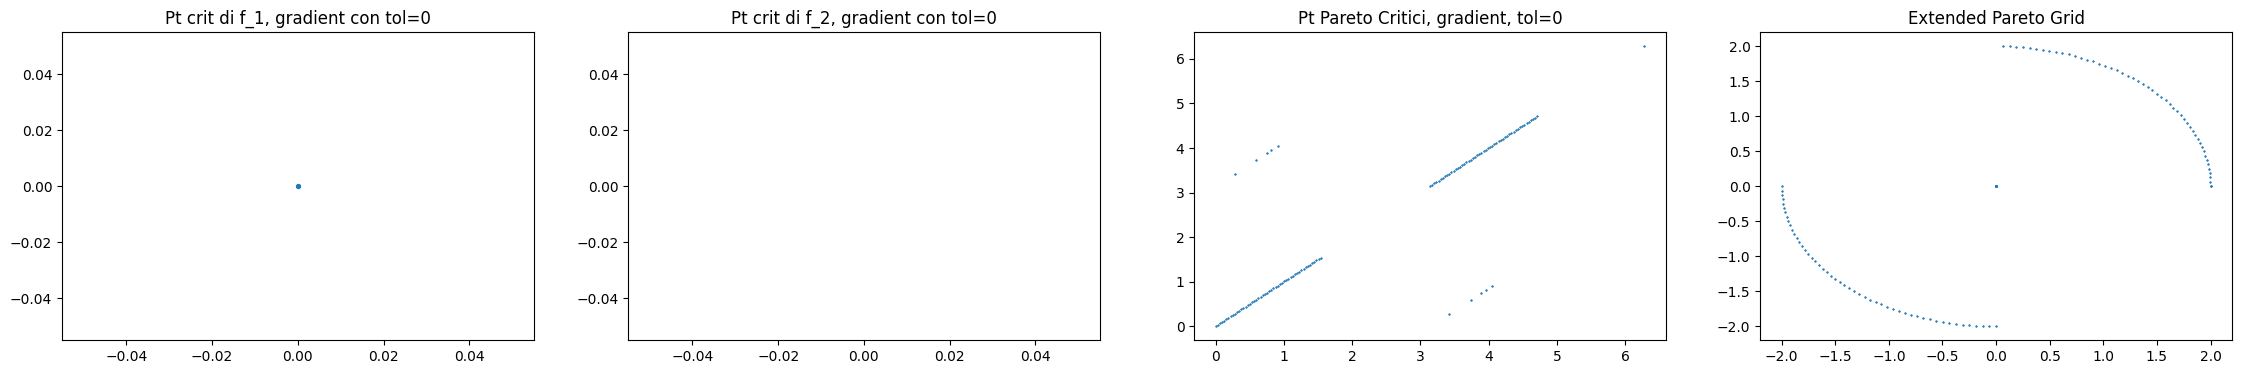

In [3]:
EPG(f1,f2,200,0,0,True)

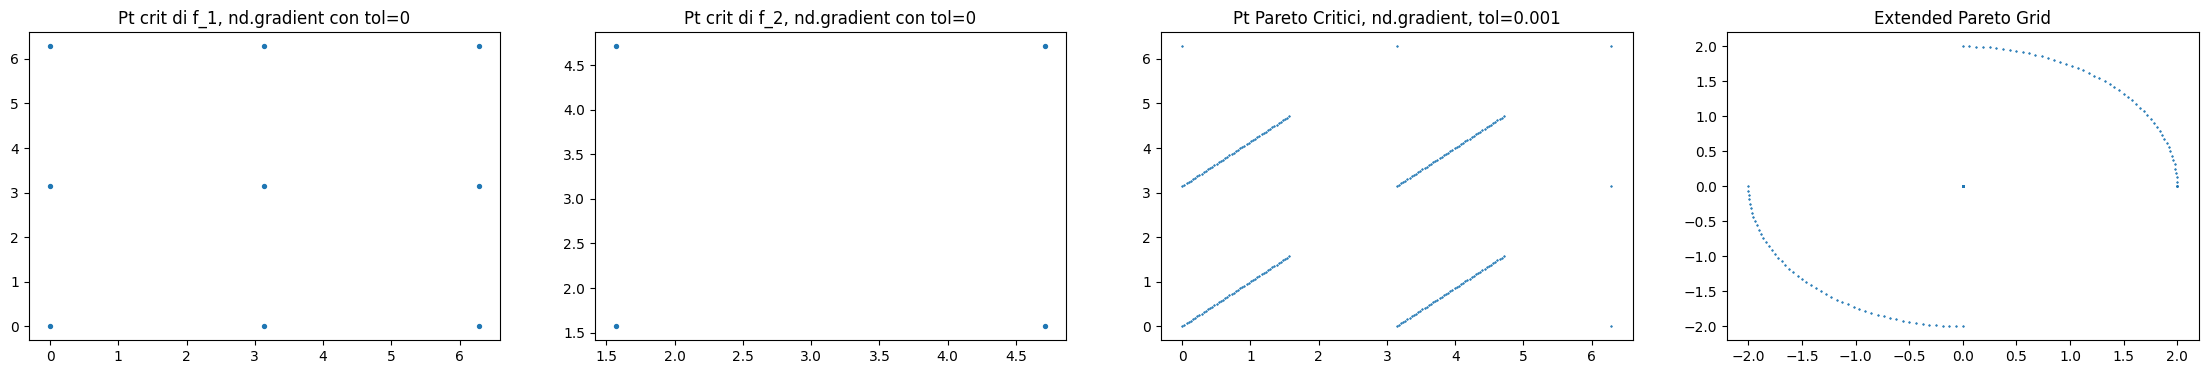

In [5]:
EPG(f_1,f_2,200,0,0.001,False)

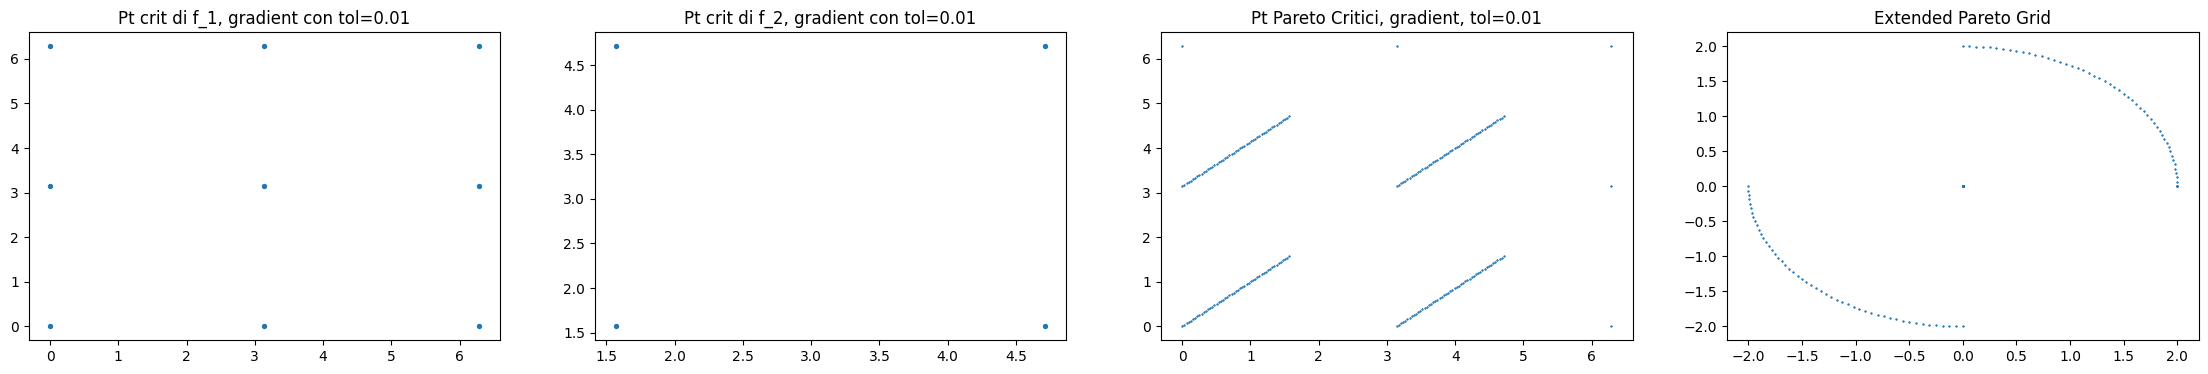

In [6]:
EPG(f1,f2,200,0.01,0.01,True)

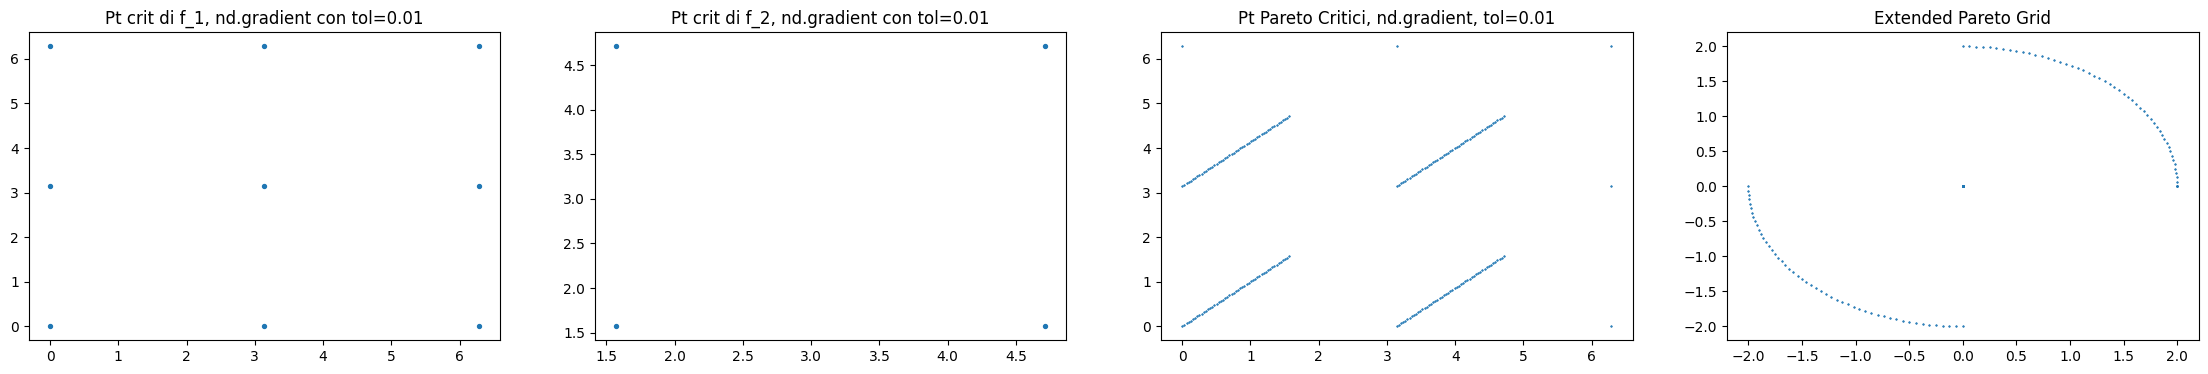

In [7]:

EPG(f_1,f_2,200,0.01,0.01,False)

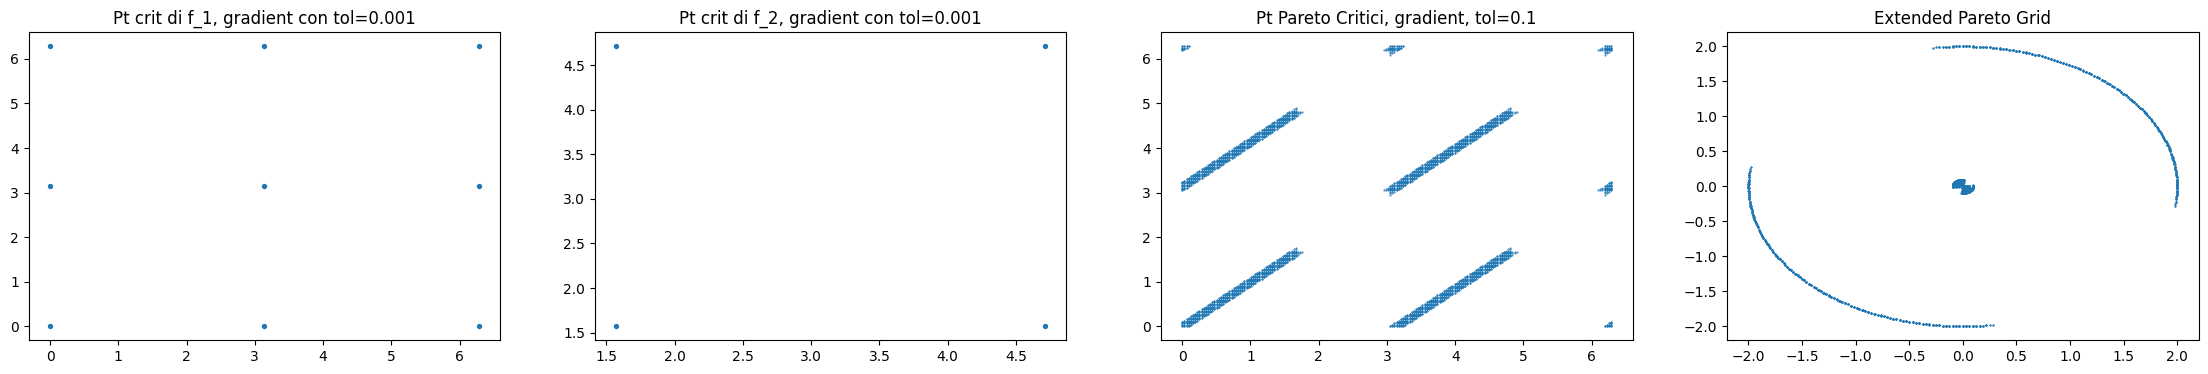

In [8]:
EPG(f1,f2,200,0.001,0.1,True)

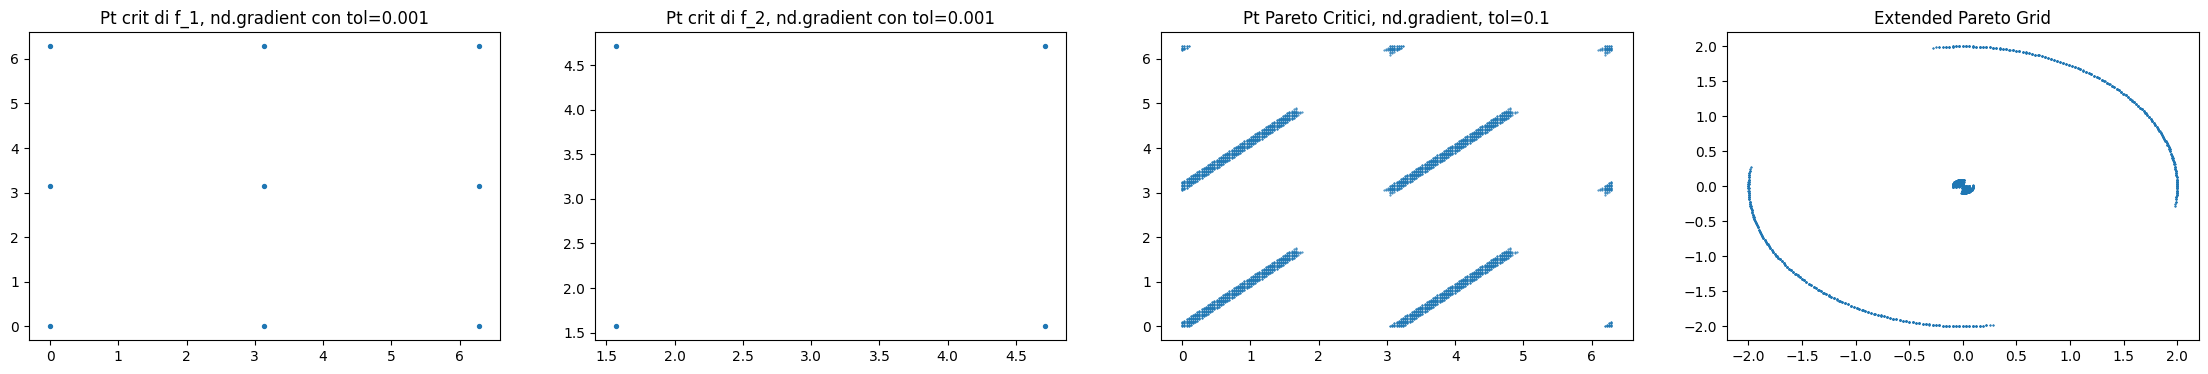

In [9]:
EPG(f_1,f_2,200,0.001,0.1,False)

### Considerazioni:

1. In grado 1 possiamo utilizzare tolleranze molto basse per ottenere un risultato soddisfacente.
2. Il tempo di esecuzione usando i gradienti calcolati con il nostro metodo è di 4/5 secondi, mentre usando il metodo nd.gradient() di Python il tempo impiegato è di 2/ minuti
3. Il risultato ottenuto in questo caso di grado 1 è visibilmente lo stesso con i due metodi

# Esempio in grado 2
$g = (\ cos(x)sen(y)\ ,\ sen(x)sen(y) + cos(y)\ )$

$\nabla{g_1} = (\ -sen(x)sen(y),\ cos(x)cos(y)\ ),\;\;\; \nabla{g_2} = (\ cos(x)sen(y),\ sen(y)cos(y)-sen(y)\ )$

Di nuovo in questo caso i punti critici di $g_1,g_2$ non coincidono.

In [10]:
g1 = parse("cosxseny")
g2 = parse("senxseny + cosy")

In [11]:
def g_1(x):
    return np.cos(x[0])*np.sin(x[1])

def g_2(x):
    return np.sin(x[0])*np.sin(x[1]) + np.cos(x[1])

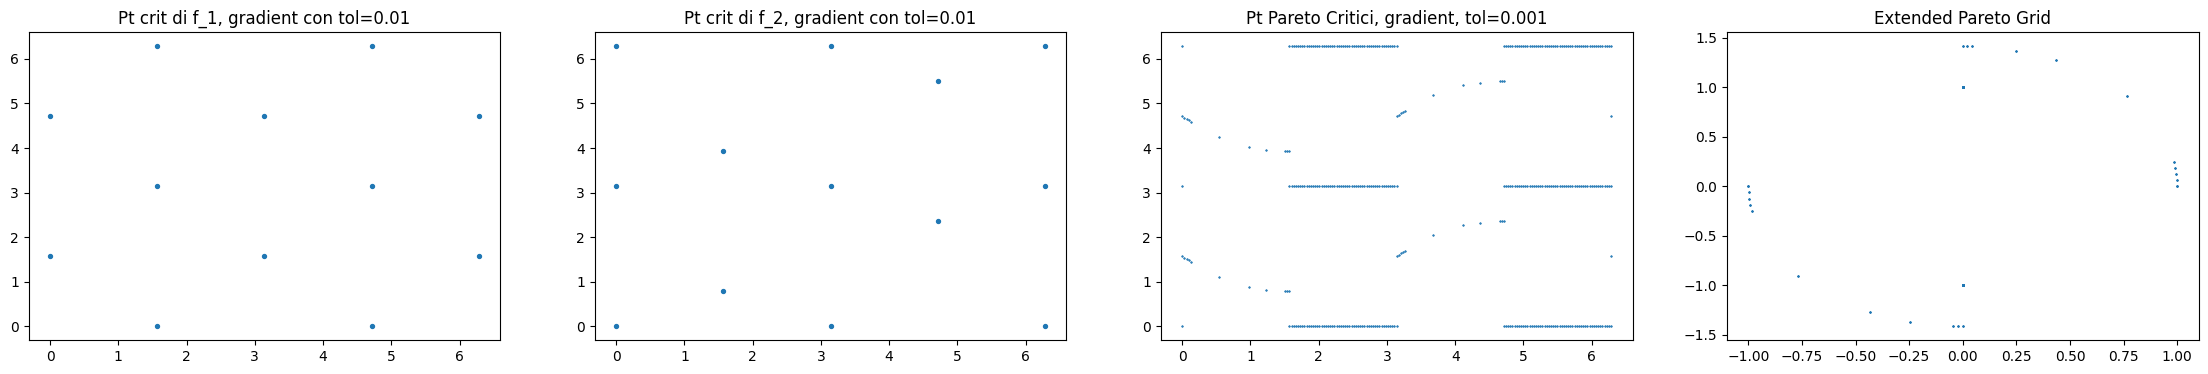

In [12]:
EPG(g1,g2,200,0.01,0.001,True)

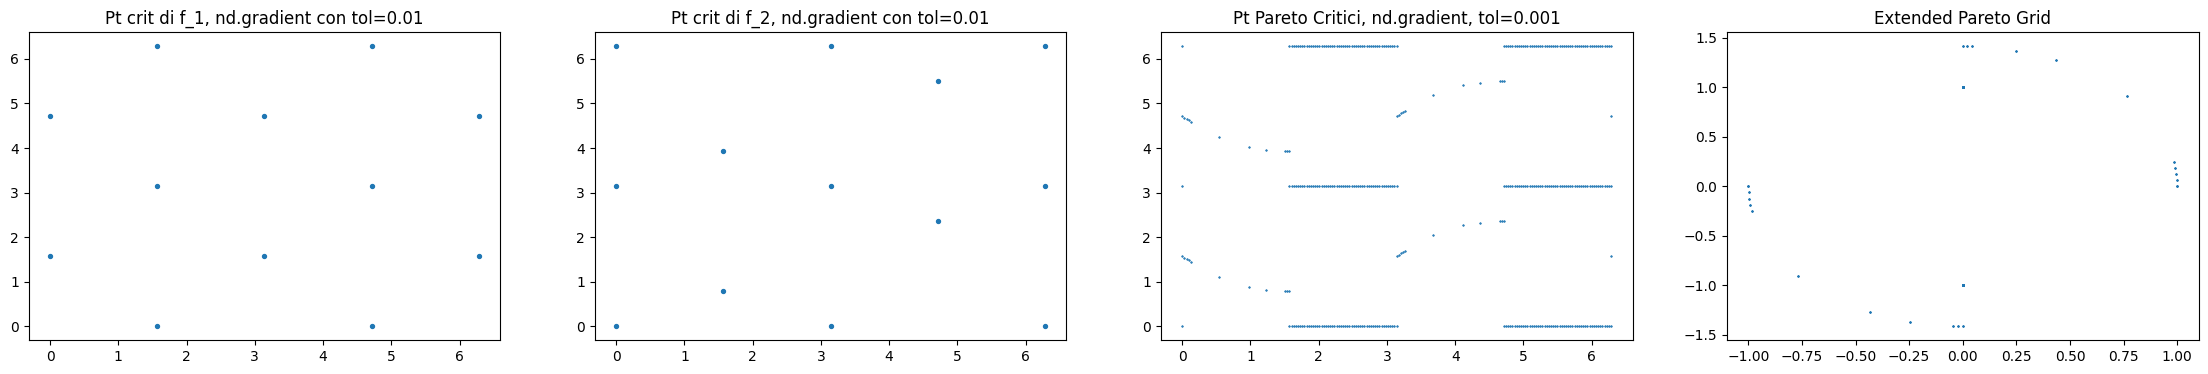

In [13]:
EPG(g_1,g_2,200,0.01,0.001,False)

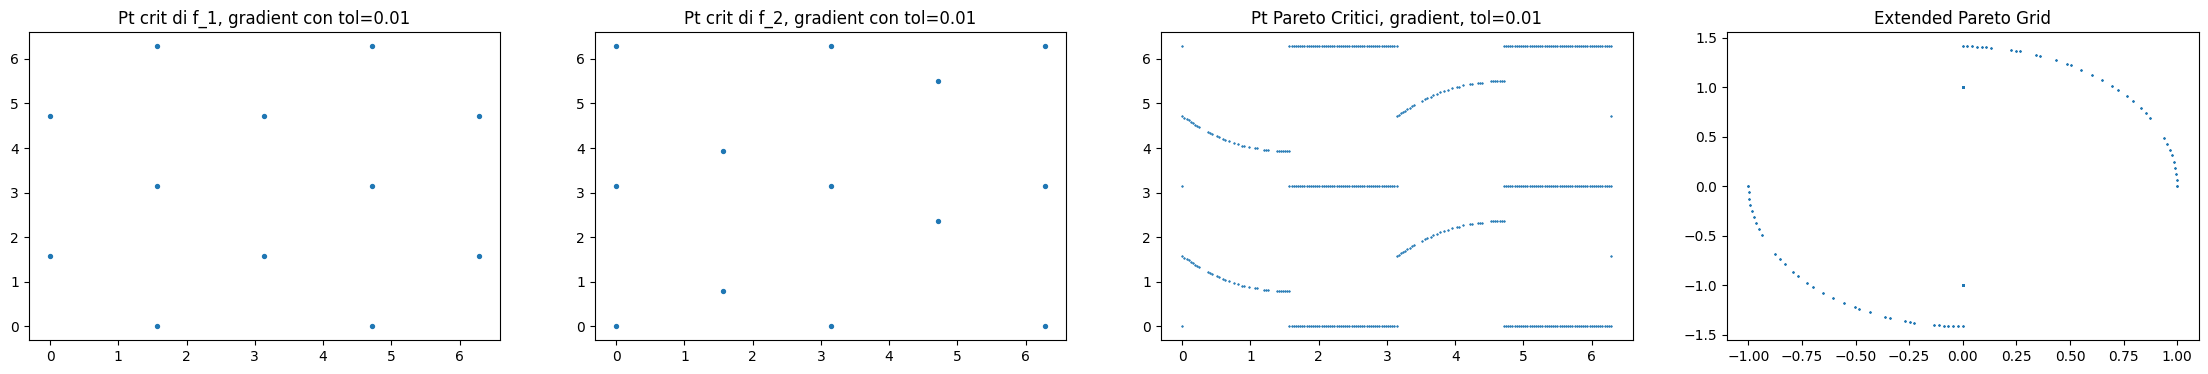

In [14]:

EPG(g1,g2,200,0.01,0.01,True)

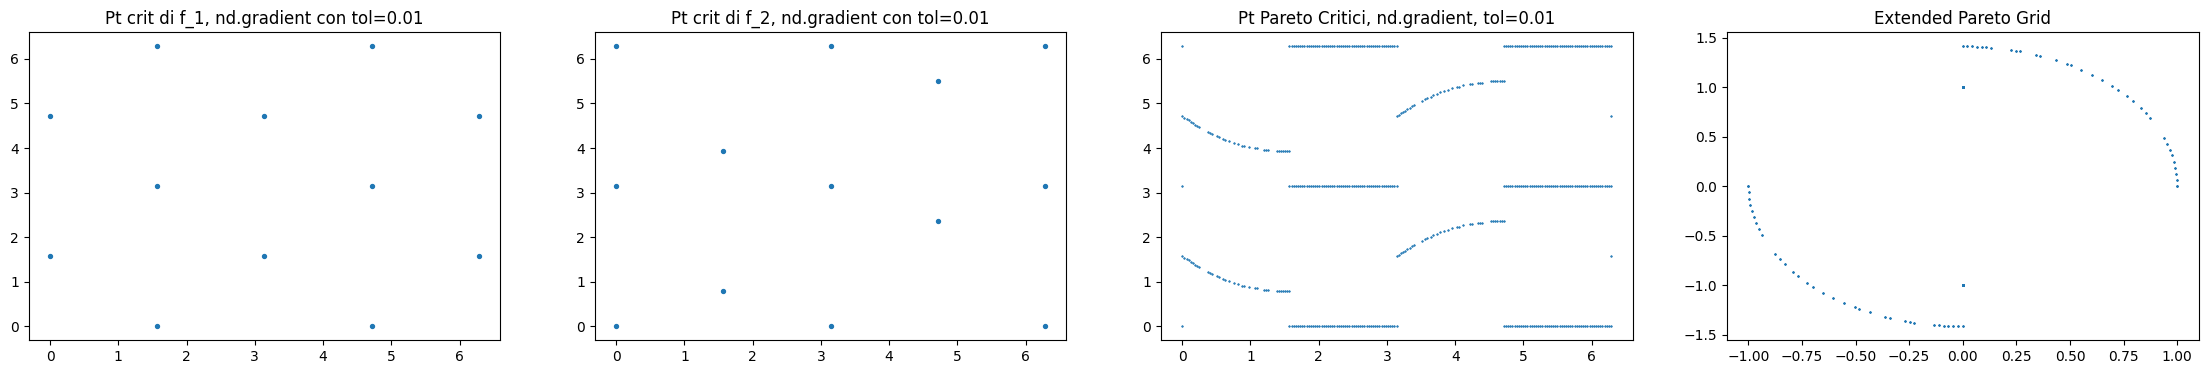

In [15]:
EPG(g_1,g_2,200,0.01,0.01,False)

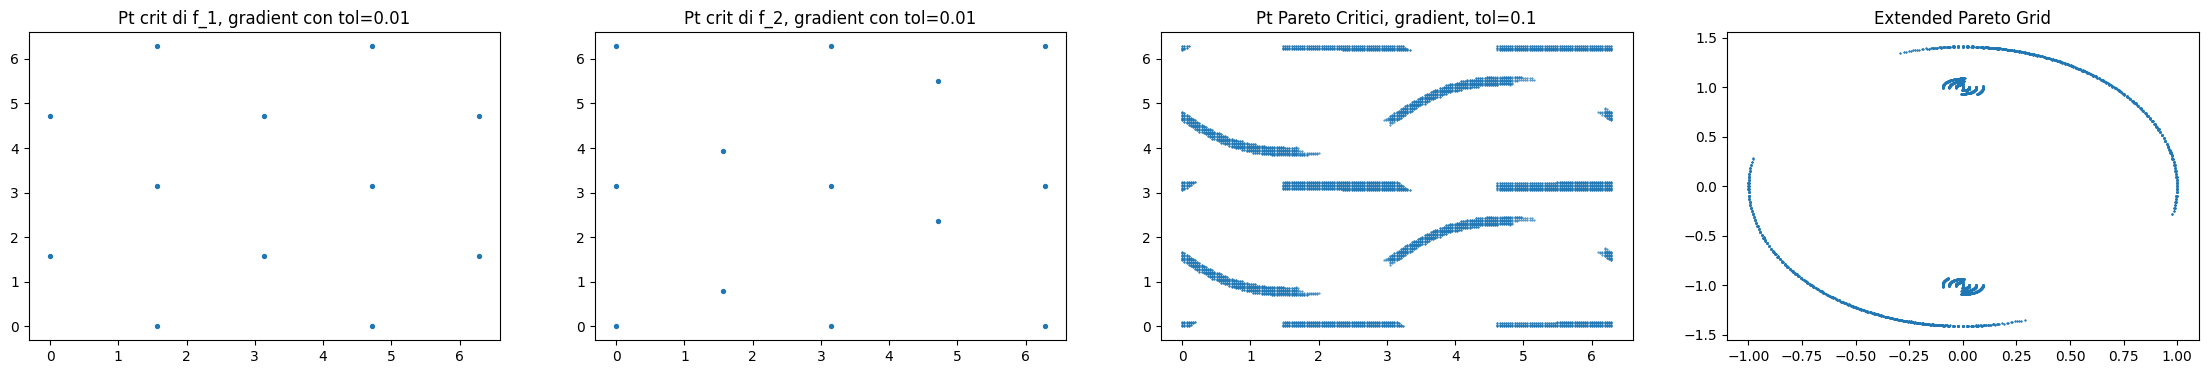

In [16]:
EPG(g1,g2,200,0.01,0.1,True)

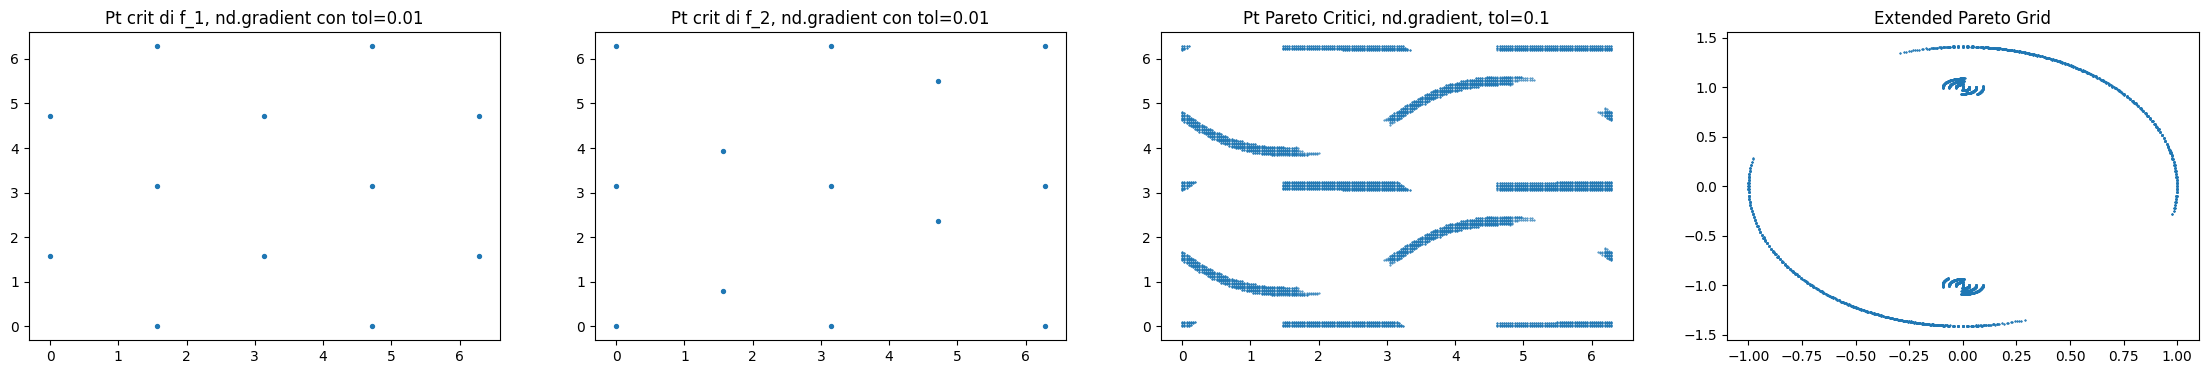

In [17]:
EPG(g_1,g_2,200,0.01,0.1,False)

### Considerazioni:
1. Utilizzando gli stessi parametri di tolleranza di prima i punti critici sono corretti, mentre i contour risultano meno chiari rispetto di prima.
2. Alzando la tolleranza per i punti pareto critici otteniamo un miglior risultato, ma troviamo un po' di noise.
3. Anche qui visivamente non ci sono differenze tra i due metodi

# Esempio in grado 3

$h = (\ 2cos(x)^2 + 4cos(y),\ sen(x)^3 + 3sen(y)^2\ )$

$\nabla{h_1} = (-4cos(x)sen(x),\ -4sen(y)),\;\;\; \nabla{h_2} = (3cos(x)sen(y)^2,\ 6sen(y)cos(y))$

Questa volta i punti $\{(u,v) \colon u,v \in \{0, \frac{\pi}{2}, \pi, \frac{3\pi}{2}\}\}$ sono critici per entrambi funzioni. Prima proviamo cosa viene fuori senza utilizzare dei shift per separare i punti critici.

In [18]:
h1 = parse("2cos^2(x) + 4cos(y)")
h2 = parse("sen^3(x) + 3sen^2(y)")

In [19]:
def h_1(x):
    return 2*np.cos(x[0])**2 + 4*np.cos(x[1])

def h_2(x):
    return np.sin(x[0])**3+3*np.sin(x[1])**2

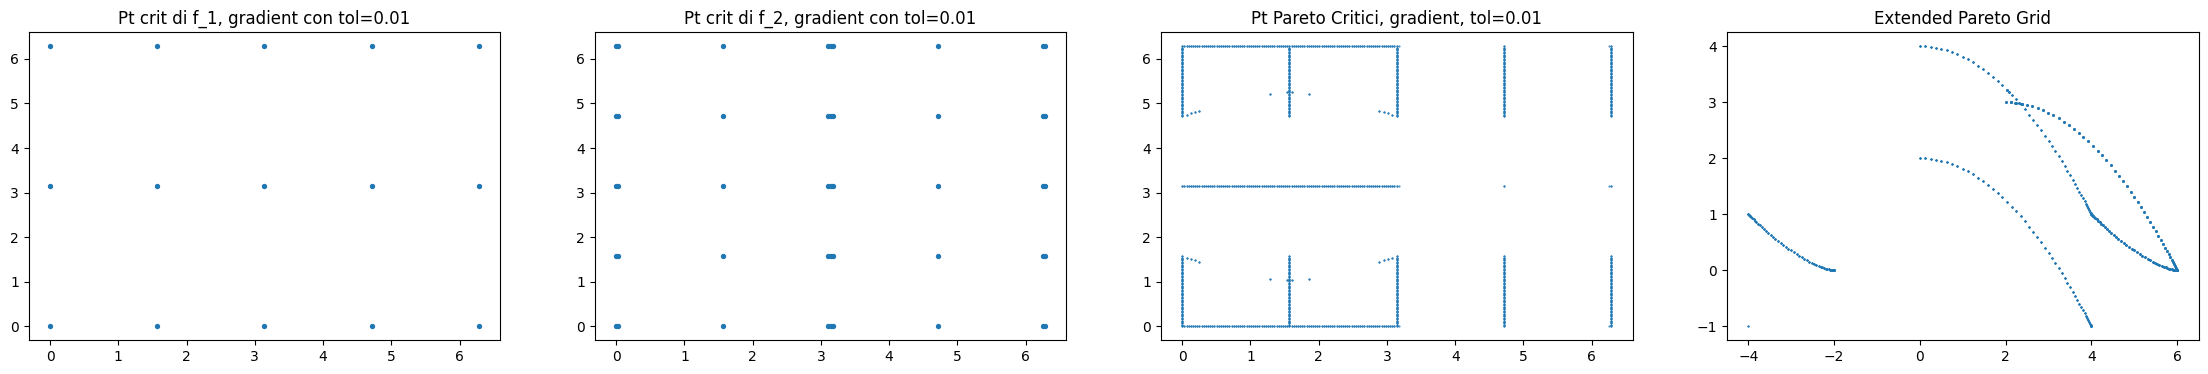

In [20]:
EPG(h1,h2,200,0.01,0.01,True)

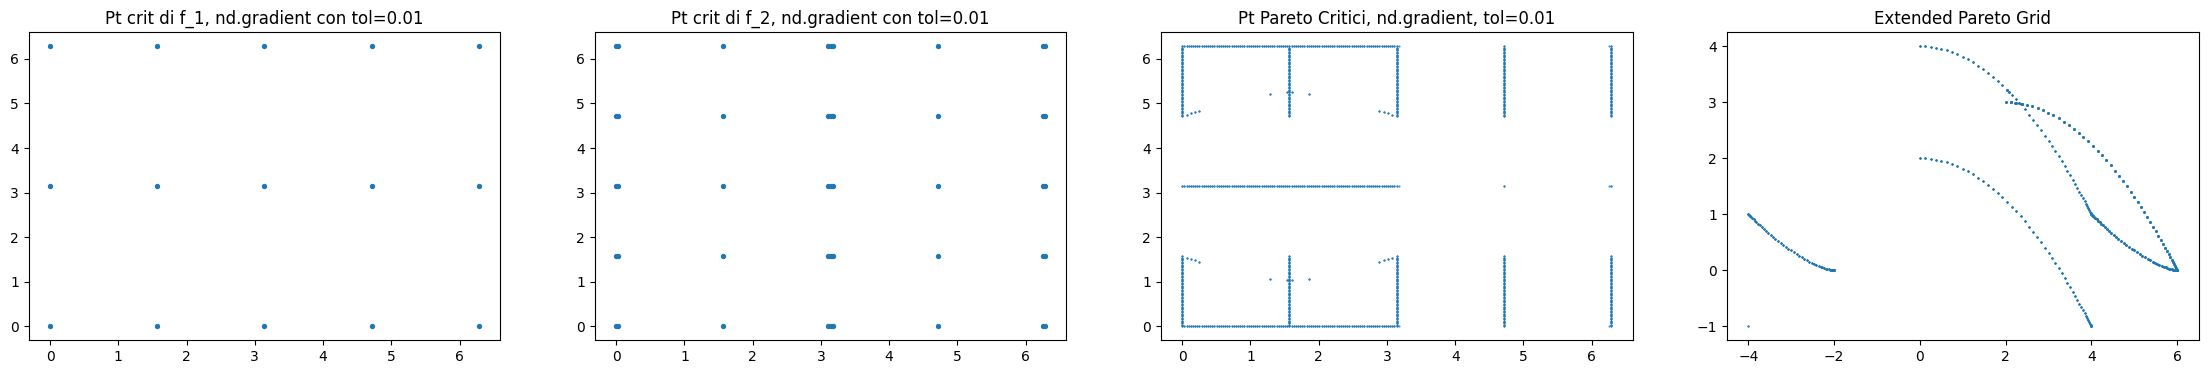

In [21]:
EPG(h_1,h_2,200,0.01,0.01,0)

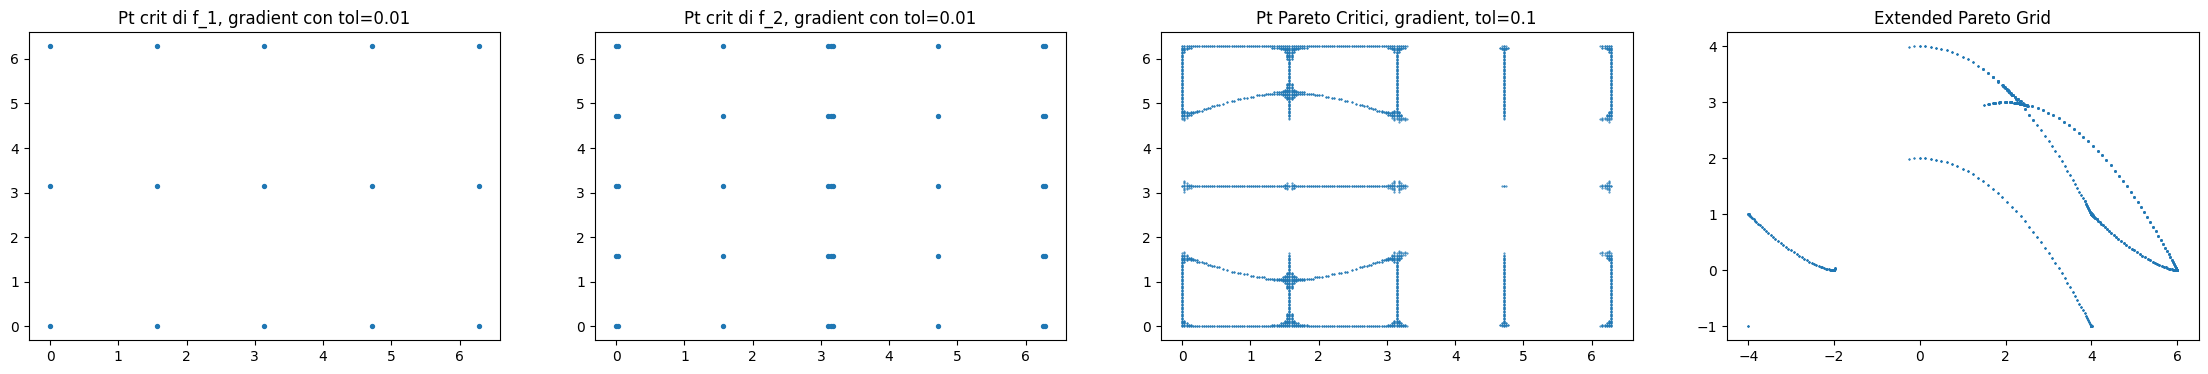

In [22]:
EPG(h1,h2,200,0.01,0.1,True)

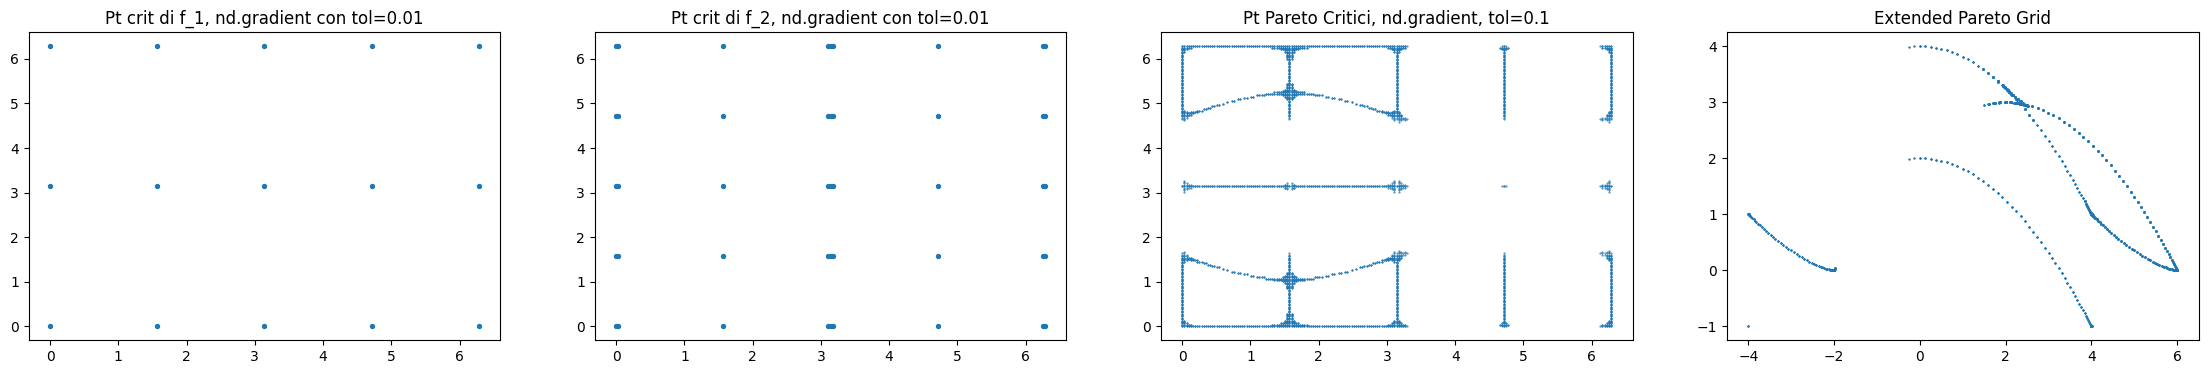

In [23]:
EPG(h_1,h_2,200,0.01,0.1,False)

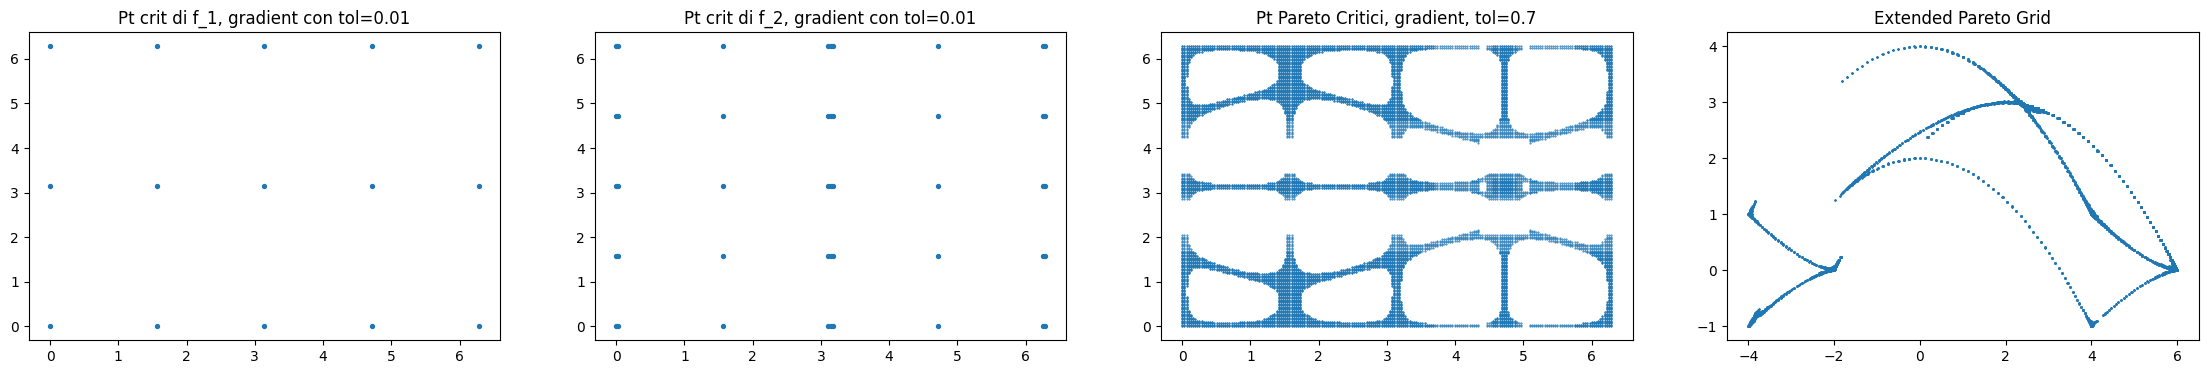

In [24]:
EPG(h1,h2,200,0.01,0.7,True)

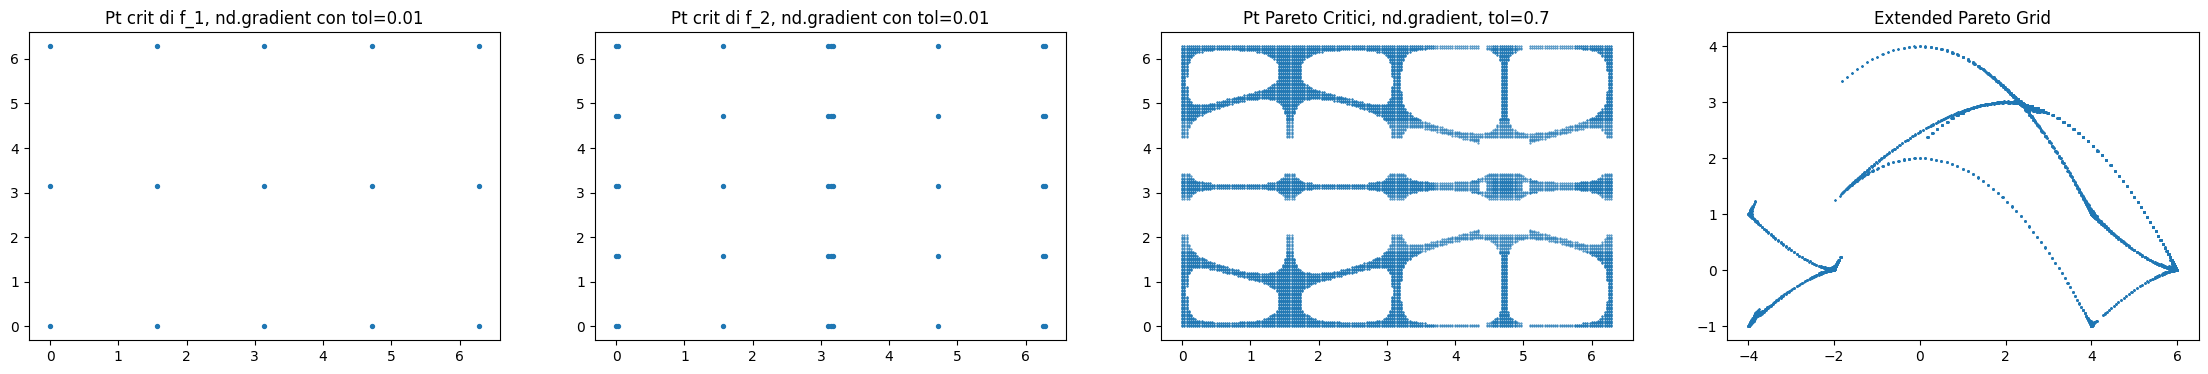

In [25]:
EPG(h_1,h_2,200,0.01,0.7,False)

### Consideralzioni:
1. Qua cominciamo a avere degli errori significativi, perchè nell'Extended Pareto Grid con tolleranza bassa mancano degli pezzi di contour, questi riusciamo a vederli aumentando molto la tolleranza (addirittura 0.7, perchè cpn 0.1 non si vedevano differenze da 0.01) per i punti Pareto Critici, però aggiungiamo tanto rumore, e neanche così si vede tutto il contour. 
2. Anche qui i tempi di esecuzione sono nettamente diversi, secondi per il nostro metodo, minuti per il metodo di Python.
3. Anche qui non vediamo differenze vsibili nel risultato

# Esempio in cui diferiscono i due metodi

Per finire vediamo un'esempio in cui abbiamo ottenuto risoltati significativamente diversi per i due metodi, in cui vediamo anche un esempio di shift negli argomenti di seno e coseno.

$\varphi = (\ 2cos^2(x+5)+4cos(y-1),\ sen^3(x)+3sen^2(y)\ )$

$\nabla{\varphi_1} = (-4sen(x+5)cos(x+5),\ -4sen(y-1)\ ),\;\;\; \nabla{\varphi_2} = (\ 3sen(x)^2 cos(x),\ 6sen(y)cos(y)\ )$

In [4]:
phi1=parse('2cos^2(x+5)+4cos(y-1)')
phi2=parse('sen^3(x)+3sen^2(y)')

In [8]:
#abbiamo un problema
print((phi1.gradient()[0]).stringa())

-4cos(x+5)sin(x)


In [27]:
def phi_1(x):
    return 2*np.cos(x[0]+5)**2+4*np.cos(x[1]-1)

def phi_2(x):
    return np.sin(x[0])**3+3*np.sin(x[1])**2

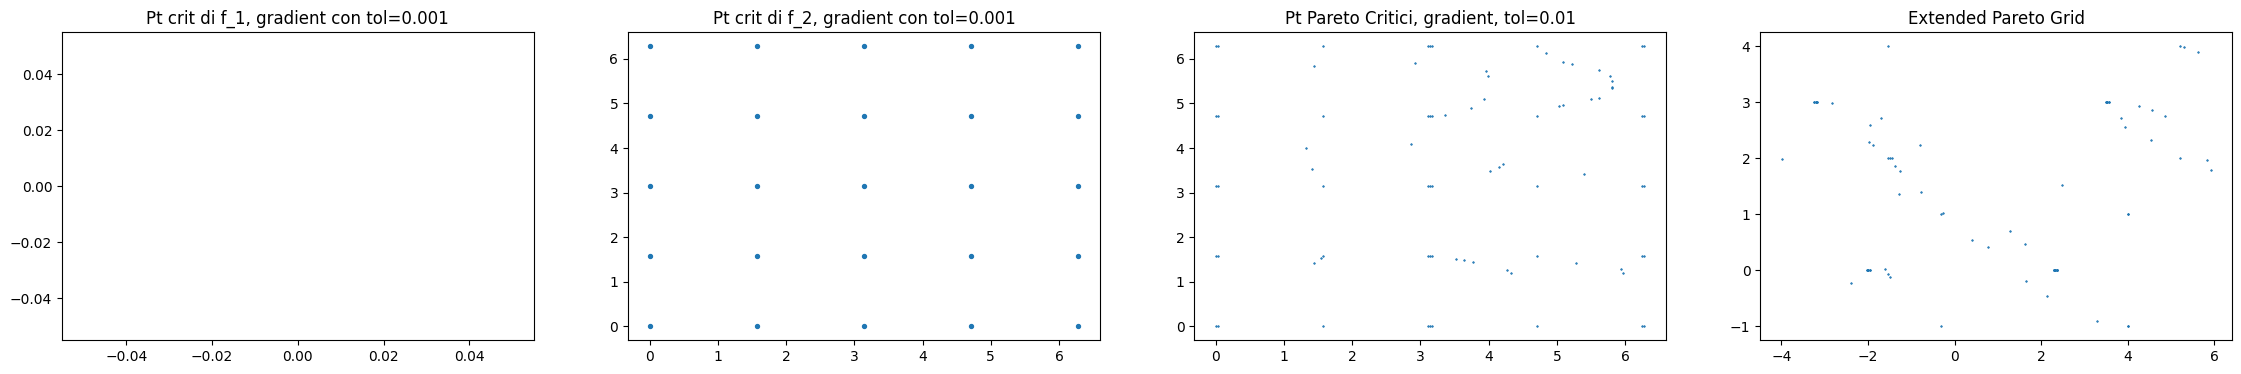

In [5]:
EPG(phi1,phi2,200,0.001,0.01,True)

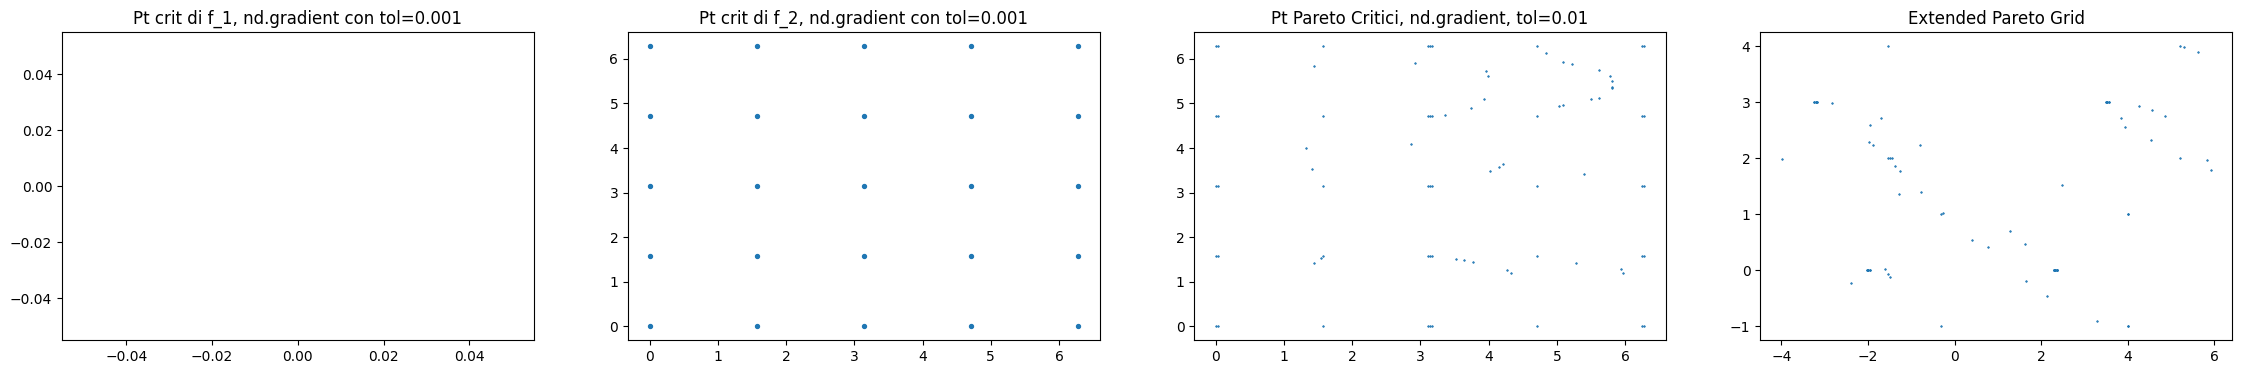

In [29]:
EPG(phi_1,phi_2,200,0.001,0.01,False)

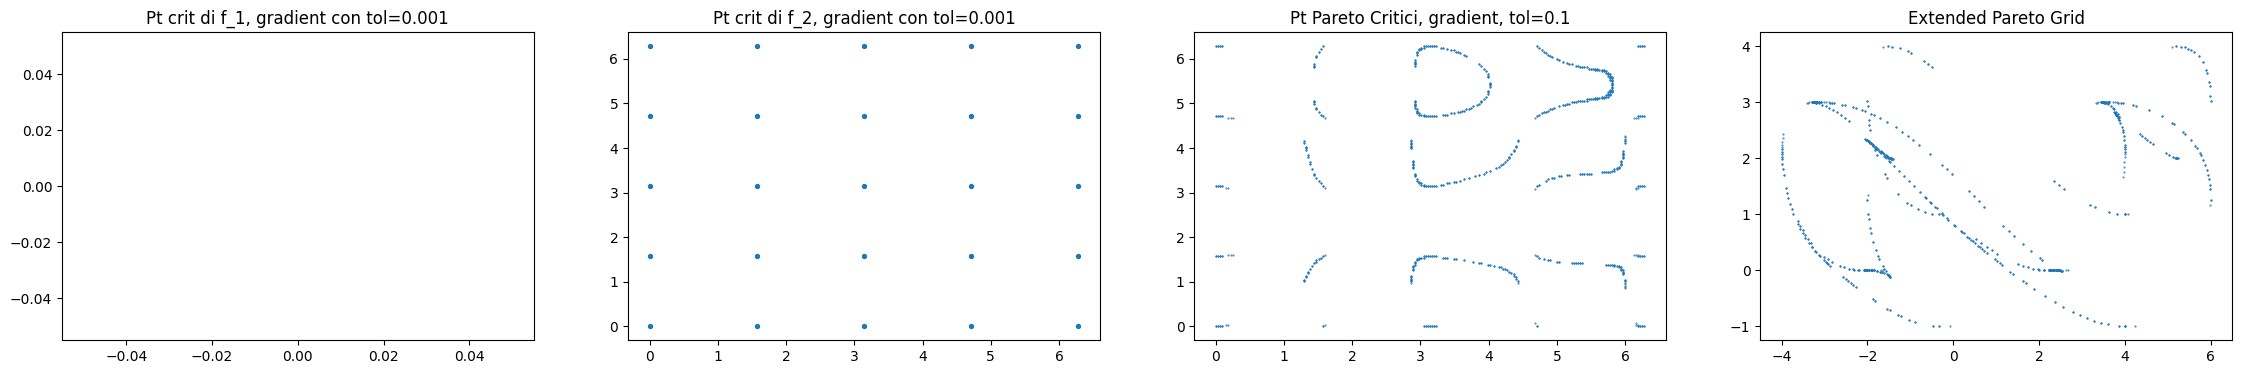

In [6]:
EPG(phi1,phi2,200,0.001,0.1,True)

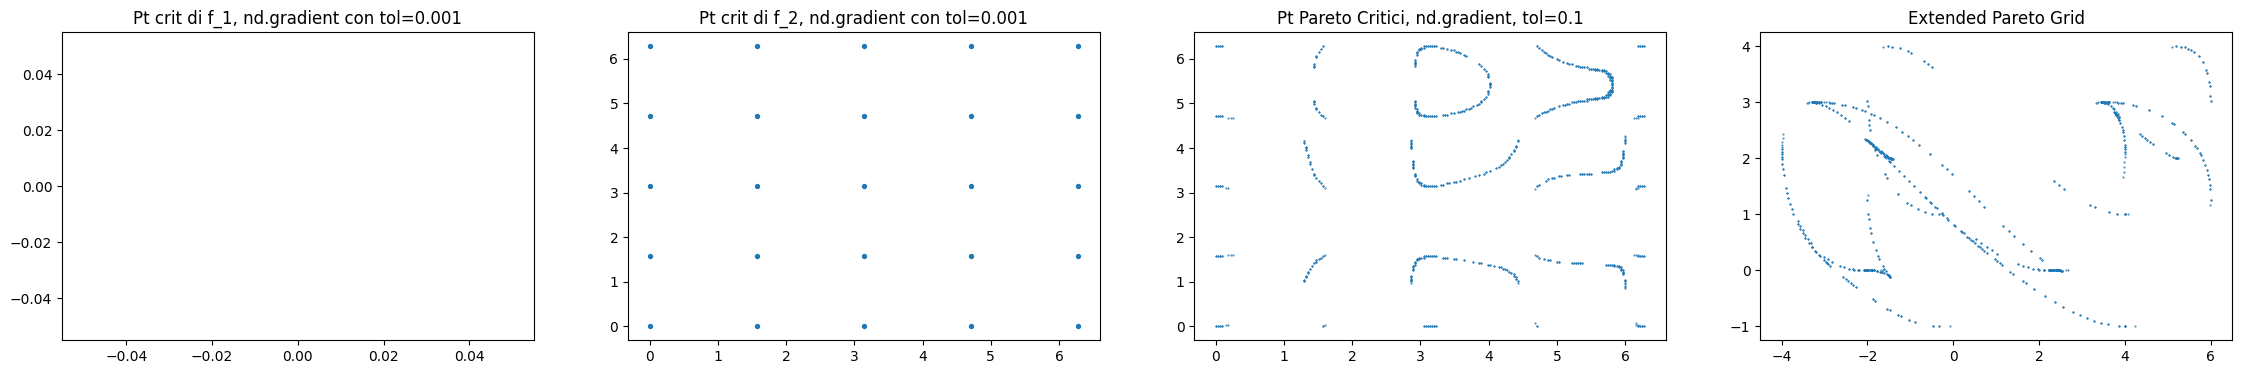

In [31]:
EPG(phi_1,phi_2,200,0.001,0.1,False)

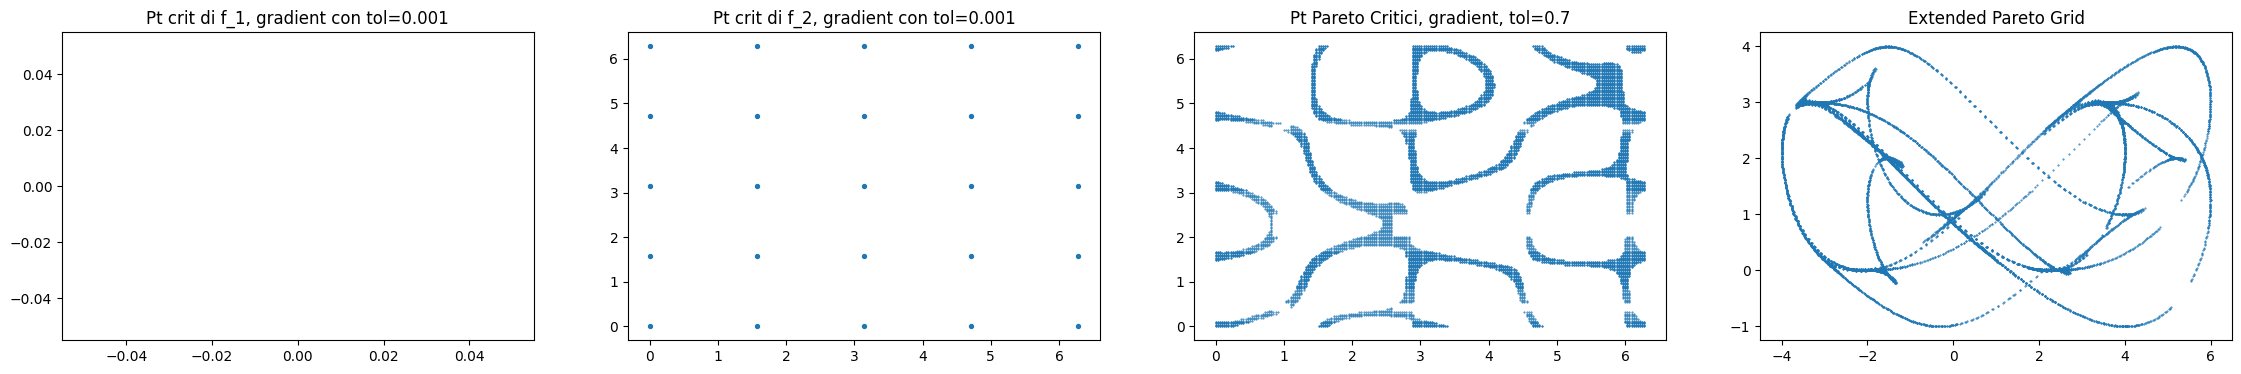

In [7]:
EPG(phi1,phi2,200,0.001,0.7,True)

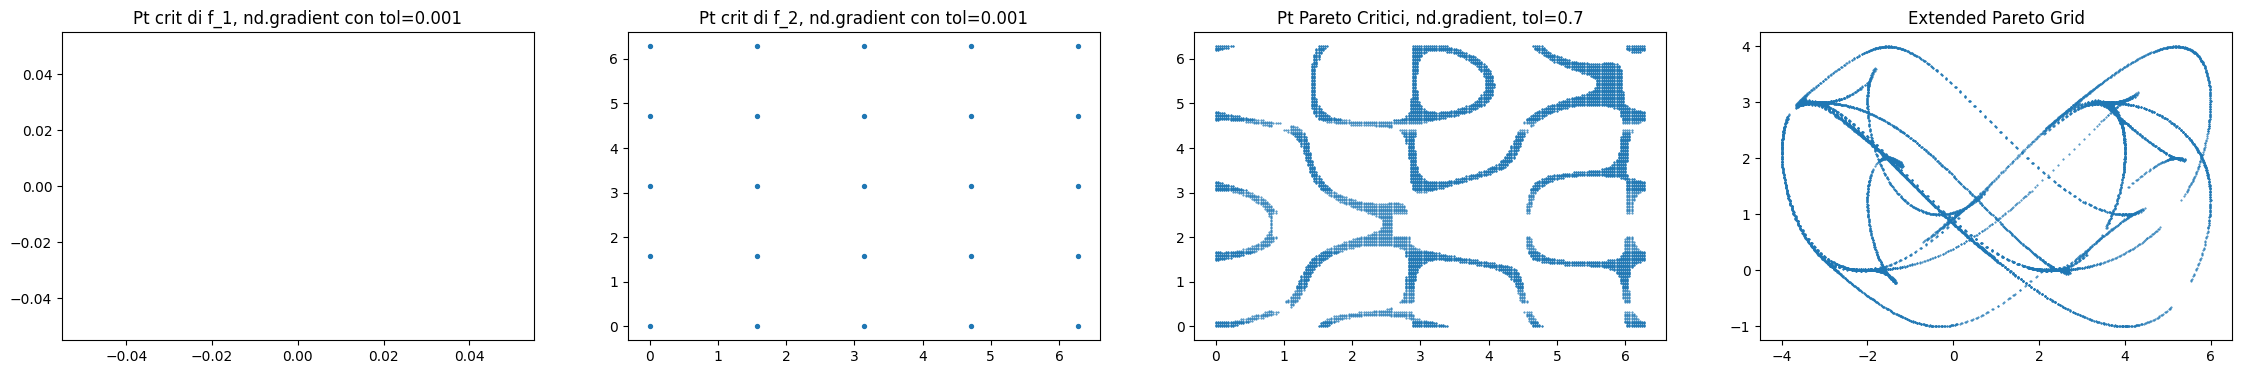

In [33]:
EPG(phi_1,phi_2,200,0.001,0.7,False)

#### Considerazioni:
1. Con tolleranza bassa, ovvero 0.01, sembrerebbe che il metodo 2 trovi più punti della EPG
2. Alzando la tolleranza, il metodo 1 trova più punti e produce meno rumore, mentre il metodo 2 trova pochi archi della EPG, producendo molto rumore.
3. Non capiamo come mai il metodo 1 che utilizza nd.gradient non trovi i punti critici di f_1